In [16]:
# script to get and plot TTS for rf06 with varying bl conditions
# date created: 2/17/2020
# author: sofia chelpon

In [17]:
############################ PREP WORKSPACE ############################

In [18]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [19]:
# read in ratios dataframe
path = "/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_bl/contrast_ratios_rf06.pkl"
contrast_ratios = pd.read_pickle(path)

In [20]:
# we use the same awas before and after shear because no samples south of shear 
# only want awas with lifetimes of > 80 days for south of shear 

# find which species need to be replaced
tracerloc = []
for index, row in contrast_ratios.iterrows():
    if ((row['Instrument'] == 'AWAS') & (row['BL_tau'] > 80)):
        #print(row)
        #row.loc[row['RF06_S of Shear'].isin([nan])]=(row['RF06_In Shear'])
        tracer = row['Trace_Gas']
        tcl = np.where((contrast_ratios['Trace_Gas'] == tracer))
        tracerloc.append(np.where(contrast_ratios['Trace_Gas'] == tracer))

# make a new column, replace the values 
sshear = contrast_ratios['RF06_S of Shear']
for ii in enumerate(tracerloc):
    myi = ii[1]
    tcl = int(myi[0])
    nv = contrast_ratios['RF06_In Shear'].iloc[tcl]
    sshear[tcl] = nv
    
# replace the original column in the dataframe with the new column 
contrast_ratios2 = contrast_ratios 
contrast_ratios2 = contrast_ratios2.drop('RF06_S of Shear', 1)
contrast_ratios2.insert(6, "RF06_S of Shear", sshear, True) 

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
# sort 
ratios_sort = contrast_ratios2.sort_values(['BL_tau'])
ratios_sort.head()

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF06_In Shear,RF06_S of Shear
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.020679,0.020869
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.013813,NaN
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.056251,NaN
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.077807,NaN
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.042267,0.411004


In [22]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [23]:
# --------------- ver 1: UT = RF06, BL = IN SHEAR 
# need to drop any row with a nan value 
idx = ratios_sort['RF06_In Shear'].index[ratios_sort['RF06_In Shear'].apply(np.isnan)]

ratios_sort_dirty = ratios_sort
ratios_sort_dirty = ratios_sort_dirty.dropna()
utbl_dirty = ratios_sort_dirty['RF06_In Shear'].values
tau_dirty = ratios_sort_dirty['BL_tau'].values

t_dirty, exp_decay_matrix_dirty, LT_dirty = tts_mod.prep_for_tts(tau_dirty)
my_mustar_dirty, my_r2_dirty, my_gf_dirty, my_t_dirty, mean_age_dirty, \
    mode_age_dirty, best_k_dirty = tts_mod.get_tts(utbl_dirty, tau_dirty, t_dirty, \
                                     exp_decay_matrix_dirty, LT_dirty)

In [24]:
# --------------- ver 1: UT = RF06, BL = IN SHEAR 
# need to drop any row with a nan value 
idx = ratios_sort['RF06_S of Shear'].index[ratios_sort['RF06_S of Shear'].apply(np.isnan)]

ratios_sort_clean = ratios_sort
ratios_sort_clean = ratios_sort_clean.dropna()
utbl_clean = ratios_sort_clean['RF06_S of Shear'].values
tau_clean = ratios_sort_clean['BL_tau'].values

t_clean, exp_decay_matrix_clean, LT_clean = tts_mod.prep_for_tts(tau_clean)
my_mustar_clean, my_r2_clean, my_gf_clean, my_t_clean, mean_age_clean, \
    mode_age_clean, best_k_clean = tts_mod.get_tts(utbl_clean, tau_clean, t_clean, \
                                     exp_decay_matrix_clean, LT_clean)

In [25]:
############ --------------- LOAD CAMPAIGN AVERAGE DATA --------------- ###########
campaign_avg_figa = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_tau/campaign_avg_figa.pkl')
campaign_avg_figb = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_tau/campaign_avg_figb.pkl')
campaign_avg_stats = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_tau/campaign_avg_stats.pkl')

campav_tau = campaign_avg_figa['tau'].values
campav_mustar = campaign_avg_figa['mustar'].values
campav_utbl = campaign_avg_figa['utbl'].values
campav_r2 = campaign_avg_stats['r squared'].values
campav_r2 = campav_r2[0]
campav_gf = campaign_avg_figb['gf'].values
campav_t = campaign_avg_figb['t'].values
campav_mean_age = campaign_avg_stats['mean age'].values
campav_mean_age = campav_mean_age[0]
campav_mode_age = campaign_avg_stats['mode age'].values
campav_mode_age = campav_mode_age[0]

In [26]:
import imp
imp.reload(tts_mod)

<module 'tts_mod' from '/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py'>

In [27]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

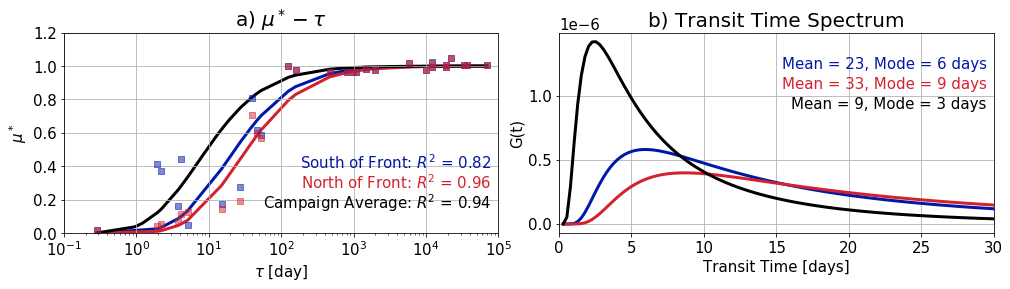

In [29]:
# --------------- start plot with campaign avg bl
title_str = 'South of Front: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_clean, my_mustar_clean, utbl_clean, my_r2_clean, 
                                        my_gf_clean, my_t_clean, mean_age_clean, mode_age_clean, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add rf08 bl case
title_str = 'North of Front: '
my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_dirty, my_mustar_dirty, utbl_dirty, my_r2_dirty,  
                                        my_gf_dirty, my_t_dirty, mean_age_dirty, mode_age_dirty, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# campaign average
title_str = 'Campaign Average: '
my_color = 'k'
overplot = 2
add_scatter = 0
add_r2 = 1 
add_meanmode = 1 

tts_mod.plot_tts(campav_tau, campav_mustar, campav_utbl, campav_r2, 
                        campav_gf, campav_t, campav_mean_age, campav_mode_age, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)


# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
fig.savefig(svpath + 'tts_vary_bl_rf06.pdf')  
#fig.savefig(svpath + 'tts_vary_bl_rf06.svg')  